# Twitter Sentiment Analysis

In [1]:
#Note: downloaded code
!pip install gensim --upgrade
!pip install keras --upgrade
!pip install pandas --upgrade

     ---------------------------------------- 24.0/24.0 MB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 58.6/58.6 KB ? eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 9.6 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 10.9 MB/s eta 0:00:00
     --------------------------------------- 10.5/10.5 MB 10.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.3
    Uninstalling pandas-1.3.3:
      Successfully uninstalled pandas-1.3.3


ERROR: Could not install packages due to an OSError: [WinError 5] 拒绝访问。: 'C:\\Users\\16680\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\~andas\\_libs\\algos.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [3]:
!pip3 install -U scikit-learn scipy matplotlib

     ---------------------------------------- 7.2/7.2 MB 10.0 MB/s eta 0:00:00
     ---------------------------------------- 36.9/36.9 MB 9.0 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 10.0 MB/s eta 0:00:00
     ------------------------------------- 307.0/307.0 KB 19.8 MB/s eta 0:00:00
     ------------------------------------- 899.5/899.5 KB 11.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.6.1
    Uninstalling scipy-1.6.1:
      Successfully uninstalled scipy-1.6.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4


ERROR: Could not install packages due to an OSError: [WinError 5] 拒绝访问。: 'C:\\Users\\16680\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\~atplotlib\\backends\\_backend_agg.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [5]:
!pip3 install tensorflow
!pip install -U nltk

     -------------------------------------- 438.0/438.0 MB 5.9 MB/s eta 0:00:00
     -------------------------------------- 462.5/462.5 KB 9.8 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 KB ? eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 11.5 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 KB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 13.9/13.9 MB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 895.7/895.7 KB 11.4 MB/s eta 0:00:00
     -------------------------------------- 126.7/126.7 KB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 9.8 MB/s eta 0:00:00
     -------------------------

In [1]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\16680\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Settings

In [2]:
# DATASET
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 3 #Only 3 epochs for comparison
BATCH_SIZE = 1024

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

### Read Dataset

### Dataset details
* **target**: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
* **ids**: The id of the tweet ( 2087)
* **date**: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
* **flag**: The query (lyx). If there is no query, then this value is NO_QUERY.
* **user**: the user that tweeted (robotickilldozr)
* **text**: the text of the tweet (Lyx is cool)

In [3]:
#dataset_filename = os.listdir("../input")[0]
#dataset_path = os.path.join("..","input",dataset_filename)
#print("Open file:", dataset_path)
df = pd.read_csv("sentiment140.csv", encoding =DATASET_ENCODING , names=DATASET_COLUMNS)

In [4]:
print("Dataset size:", len(df))

Dataset size: 1600000


In [5]:
df.head(5)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Cut off data size to 80000 tweets

In [6]:
df1 = pd.DataFrame(df)
neg_df = df[df['target'] == 0].head(40000)
pos_df = df1[df1['target'] == 4].head(40000)
frames = [neg_df, pos_df]
df = pd.concat(frames)

In [7]:
pos_df.target.unique()

array([4], dtype=int64)

In [8]:
df.target.unique()

array([0, 4], dtype=int64)

In [9]:
len(df)

80000

### Map target label to String
* **0** -> **NEGATIVE**
* **2** -> **NEUTRAL**
* **4** -> **POSITIVE**

In [10]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [11]:
%%time
df.target = df.target.apply(lambda x: decode_sentiment(x))

Wall time: 15.6 ms


Text(0.5, 1.0, 'Dataset labels distribuition')

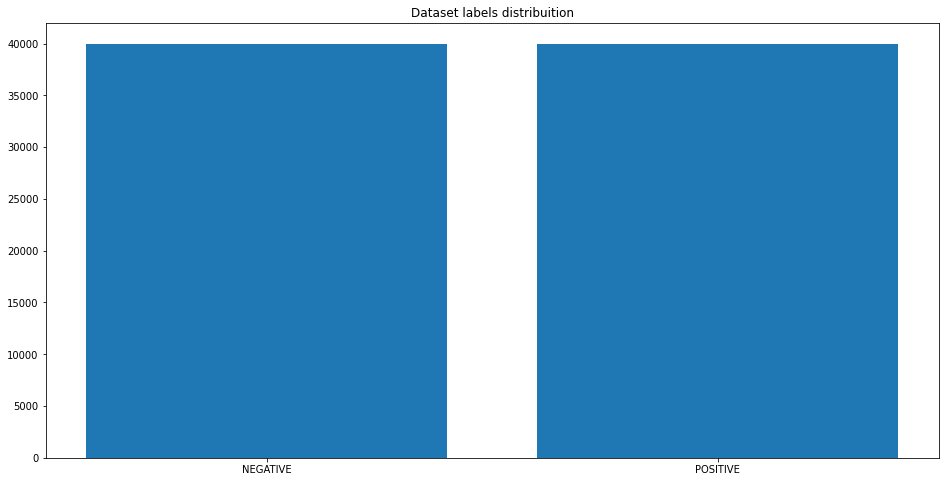

In [12]:
target_cnt = Counter(df.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

### Pre-Process dataset

We will start by using the netlinguo dictionary

In [14]:
netlingo = pd.read_csv("netlingo.csv")
netlingo.head()

,Unnamed: 0,abbr,meaning
0,0,#FF,Follow Friday
1,1,(U),"it means arms around you, hug for you"
2,2,*$,Starbucks
3,3,**//,"it means wink wink, nudge nudge"
4,4,",!!!!",Talk to the hand


In [15]:
netlingo_dict = dict(zip(netlingo.abbr, netlingo.meaning))

In [16]:
stemmer = SnowballStemmer("english")

In [17]:
def preprocess(text, stem = False, soundex = False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token in netlingo_dict:
            token = netlingo_dict.get(token)
        if stem:
            tokens.append(stemmer.stem(token))
        else:
            tokens.append(token)
    return " ".join(tokens)

In [18]:
%%time
df.text = df.text.apply(lambda x: preprocess(x, stem = True))

Wall time: 8.12 s


In [19]:
#Remember to just save this preprocessed dataframe. No need to change unless enperimenting on this again

### Split train and test

In [20]:
df_train, df_test = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 64000
TEST size: 16000


### Word2Vec 

In [21]:
%%time
documents = [_text.split() for _text in df_train.text] 

Wall time: 170 ms


In [22]:
w2v_model = gensim.models.word2vec.Word2Vec(vector_size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

2022-04-05 14:44:13,153 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec(vocab=0, vector_size=300, alpha=0.025)', 'datetime': '2022-04-05T14:44:13.134718', 'gensim': '4.1.2', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'created'}


In [23]:
w2v_model.build_vocab(documents)

2022-04-05 14:44:14,299 : INFO : collecting all words and their counts
2022-04-05 14:44:14,300 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-04-05 14:44:14,322 : INFO : PROGRESS: at sentence #10000, processed 132899 words, keeping 11032 word types
2022-04-05 14:44:14,346 : INFO : PROGRESS: at sentence #20000, processed 265205 words, keeping 16741 word types
2022-04-05 14:44:14,386 : INFO : PROGRESS: at sentence #30000, processed 399502 words, keeping 21300 word types
2022-04-05 14:44:14,416 : INFO : PROGRESS: at sentence #40000, processed 533121 words, keeping 25365 word types
2022-04-05 14:44:14,441 : INFO : PROGRESS: at sentence #50000, processed 666432 words, keeping 29007 word types
2022-04-05 14:44:14,477 : INFO : PROGRESS: at sentence #60000, processed 799752 words, keeping 32288 word types
2022-04-05 14:44:14,493 : INFO : collected 33582 word types from a corpus of 852379 raw words and 64000 sentences
2022-04-05 14:44:14,493 : INFO : Creating a 

In [24]:
words = w2v_model.wv.key_to_index.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 4198


In [25]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

2022-04-05 14:44:19,998 : INFO : Word2Vec lifecycle event {'msg': 'training model with 8 workers on 4198 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=7 shrink_windows=True', 'datetime': '2022-04-05T14:44:19.998932', 'gensim': '4.1.2', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'train'}
2022-04-05 14:44:20,347 : INFO : worker thread finished; awaiting finish of 7 more threads
2022-04-05 14:44:20,354 : INFO : worker thread finished; awaiting finish of 6 more threads
2022-04-05 14:44:20,355 : INFO : worker thread finished; awaiting finish of 5 more threads
2022-04-05 14:44:20,356 : INFO : worker thread finished; awaiting finish of 4 more threads
2022-04-05 14:44:20,357 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-05 14:44:20,358 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-05 14:44:20,365 : INFO : work

2022-04-05 14:44:23,573 : INFO : worker thread finished; awaiting finish of 7 more threads
2022-04-05 14:44:23,575 : INFO : worker thread finished; awaiting finish of 6 more threads
2022-04-05 14:44:23,576 : INFO : worker thread finished; awaiting finish of 5 more threads
2022-04-05 14:44:23,586 : INFO : worker thread finished; awaiting finish of 4 more threads
2022-04-05 14:44:23,594 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-05 14:44:23,595 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-05 14:44:23,598 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-05 14:44:23,607 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-05 14:44:23,608 : INFO : EPOCH - 10 : training on 852379 raw words (592992 effective words) took 0.4s, 1421164 effective words/s
2022-04-05 14:44:24,086 : INFO : worker thread finished; awaiting finish of 7 more threads
2022-04-05 14:44:24,088 : INFO : worker thre

2022-04-05 14:44:27,147 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-05 14:44:27,149 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-05 14:44:27,149 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-05 14:44:27,150 : INFO : EPOCH - 19 : training on 852379 raw words (593202 effective words) took 0.4s, 1667233 effective words/s
2022-04-05 14:44:27,487 : INFO : worker thread finished; awaiting finish of 7 more threads
2022-04-05 14:44:27,489 : INFO : worker thread finished; awaiting finish of 6 more threads
2022-04-05 14:44:27,491 : INFO : worker thread finished; awaiting finish of 5 more threads
2022-04-05 14:44:27,492 : INFO : worker thread finished; awaiting finish of 4 more threads
2022-04-05 14:44:27,495 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-05 14:44:27,499 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-05 14:44:27,501 : INFO : worker thre

2022-04-05 14:44:30,597 : INFO : worker thread finished; awaiting finish of 7 more threads
2022-04-05 14:44:30,598 : INFO : worker thread finished; awaiting finish of 6 more threads
2022-04-05 14:44:30,603 : INFO : worker thread finished; awaiting finish of 5 more threads
2022-04-05 14:44:30,604 : INFO : worker thread finished; awaiting finish of 4 more threads
2022-04-05 14:44:30,606 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-05 14:44:30,613 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-05 14:44:30,614 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-05 14:44:30,615 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-05 14:44:30,615 : INFO : EPOCH - 29 : training on 852379 raw words (593578 effective words) took 0.3s, 1875947 effective words/s
2022-04-05 14:44:30,929 : INFO : worker thread finished; awaiting finish of 7 more threads
2022-04-05 14:44:30,930 : INFO : worker thre

Wall time: 11.7 s


(18977947, 27276128)

In [26]:
w2v_model.wv.most_similar("love")

[('appreci', 0.3604010343551636),
 ('loooov', 0.3420332670211792),
 ('lovin', 0.3192489445209503),
 ('bless', 0.3190356492996216),
 ('miss', 0.3033078610897064),
 ('amaz', 0.29797351360321045),
 ('lov', 0.29787465929985046),
 ('ador', 0.2969639003276825),
 ('awsom', 0.2839828133583069),
 ('met', 0.27615639567375183)]

### Tokenize Text

In [27]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 33565
Wall time: 758 ms


In [28]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=SEQUENCE_LENGTH)

Wall time: 1.72 s


### Label Encoder 

In [29]:
labels = df_train.target.unique().tolist()
labels.append(NEUTRAL)
labels

['NEGATIVE', 'POSITIVE', 'NEUTRAL']

In [30]:
encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

y_train = encoder.transform(df_train.target.tolist())
y_test = encoder.transform(df_test.target.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (64000, 1)
y_test (16000, 1)


In [31]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (64000, 300)
y_train (64000, 1)

x_test (16000, 300)
y_test (16000, 1)


In [32]:
y_train[:10]

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0]])

### Embedding layer

In [33]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(33565, 300)


In [34]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

### Build Model

In [35]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          10069500  
                                                                 
 dropout (Dropout)           (None, 300, 300)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,230,001
Trainable params: 160,501
Non-trainable params: 10,069,500
_________________________________________________________________


### Compile model

In [36]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

### Callbacks

In [37]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

### Train

In [39]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=8,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
57/57 [==============================] - 559s 10s/step - loss: 0.4685 - accuracy: 0.7761 - val_loss: 0.4695 - val_accuracy: 0.7869 - lr: 0.0010
Epoch 2/8
57/57 [==============================] - 566s 10s/step - loss: 0.4640 - accuracy: 0.7789 - val_loss: 0.4692 - val_accuracy: 0.7880 - lr: 0.0010
Epoch 3/8
57/57 [==============================] - 548s 10s/step - loss: 0.4607 - accuracy: 0.7825 - val_loss: 0.4639 - val_accuracy: 0.7894 - lr: 0.0010
Epoch 4/8
57/57 [==============================] - 555s 10s/step - loss: 0.4580 - accuracy: 0.7828 - val_loss: 0.4592 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 5/8
57/57 [==============================] - 559s 10s/step - loss: 0.4532 - accuracy: 0.7854 - val_loss: 0.4569 - val_accuracy: 0.7939 - lr: 0.0010
Epoch 6/8
57/57 [==============================] - 560s 10s/step - loss: 0.4483 - accuracy: 0.7881 - val_loss: 0.4494 - val_accuracy: 0.7955 - lr: 0.0010
Epoch 7/8
57/57 [==============================] - 565s 10s/step - loss: 0.4

### Evaluate

In [40]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

16/16 [==============================] - 18s 1s/step - loss: 0.4503 - accuracy: 0.7944

ACCURACY: 0.7944375276565552
LOSS: 0.45034313201904297
Wall time: 17.8 s


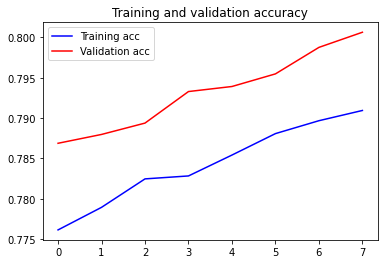

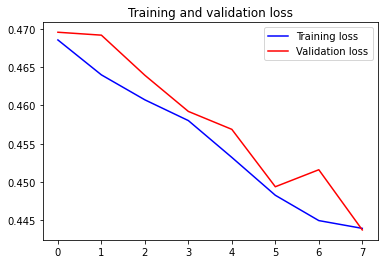

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

### Predict

In [40]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = NEUTRAL
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [41]:
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

In [42]:
predict("I love the music")

{'label': 'POSITIVE',
 'score': 0.9915658235549927,
 'elapsed_time': 0.20718789100646973}

In [43]:
predict("I hate the rain")

{'label': 'NEGATIVE',
 'score': 0.009199321269989014,
 'elapsed_time': 0.04604172706604004}

In [44]:
predict("The company is one hell of a choice ")

{'label': 'NEUTRAL',
 'score': 0.4135376513004303,
 'elapsed_time': 0.0470428466796875}

### Confusion Matrix

In [94]:
%%time
y_pred_1d = []
y_test_1d = list(df_test.target)
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]

2/2 [==============================] - 9s 5s/step
Wall time: 9.22 s


In [95]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

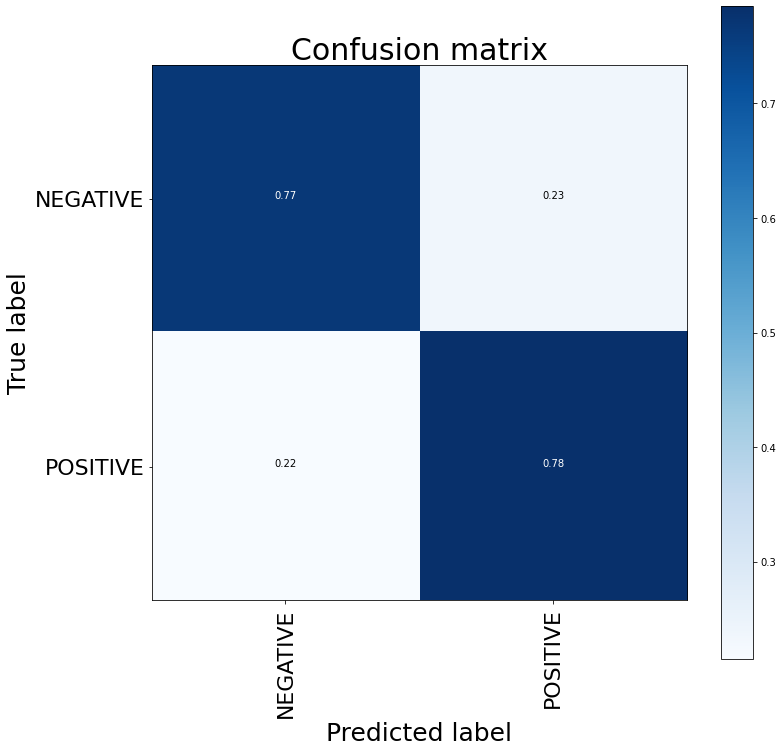

Wall time: 200 ms


In [96]:
%%time

cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.target.unique(), title="Confusion matrix")
plt.show()

### Classification Report

In [97]:
print(classification_report(y_test_1d, y_pred_1d))

              precision    recall  f1-score   support

    NEGATIVE       0.78      0.77      0.77      7979
    POSITIVE       0.77      0.78      0.78      8021

    accuracy                           0.77     16000
   macro avg       0.78      0.77      0.77     16000
weighted avg       0.78      0.77      0.77     16000



### Accuracy Score

In [98]:
accuracy_score(y_test_1d, y_pred_1d)

0.7749375

### Save model

In [50]:
#Remember to specify name!!!!
#Remember to save the hard-calculated lemmatization!!!!!

model.save(KERAS_MODEL)
w2v_model.save(WORD2VEC_MODEL)
pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)

2022-04-02 12:42:00,840 : INFO : Word2Vec lifecycle event {'fname_or_handle': 'model.w2v', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2022-04-02T12:42:00.840883', 'gensim': '4.1.2', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'saving'}
2022-04-02 12:42:00,842 : INFO : not storing attribute cum_table
2022-04-02 12:42:01,125 : INFO : saved model.w2v
